In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

Napisz funkcję generującą wykres punktowy (wykres rozrzutu).
Ta funkcja została zaprojektowana do przyjmowania co najmniej trzech podstawowych parametrów: x, y i color, które odpowiadają odpowiednio danym dla osi X, osi Y i zmiennej określającej kolory punktów.

Opcjonalnie funkcja może również pozwalać na określenie "zbioru danych", wraz z określonymi kolumnami, które mają być wykorzystane dla osi X, osi Y i wymiaru koloru.

Zastosuj funkcję niestandardową do co najmniej dwóch z następujących zestawów danych, z którymi wcześniej pracowałeś.

Zapisz wygenerowany wykres jako plik .png, umożliwiając łatwe udostępnianie i odwoływanie się do niego.

In [2]:
def plot_draw(x, y, data=None, color="red"):
    if data is not None:
        if x == "index":
            x = data.index
        else:    
            x = data[x]
        y = data[y]
    fig, ax = plt.subplots(figsize=(10,5))
    ax.plot(x, y, color=color)
    fig.set_size_inches([10, 5])
    fig.savefig(f'Picture.png')
    plt.show()

In [3]:
url='https://raw.githubusercontent.com/matzim95/ML-datasets/master/weather.csv'

weather=pd.read_csv(
    url,
    parse_dates=True,
    index_col='date'
)


In [4]:
url1 = 'https://raw.githubusercontent.com/matzim95/ML-datasets/master/temperature.csv'

temperature=pd.read_csv(
    url1,
    parse_dates=True,
    index_col='dt'
)

In [5]:
url2 = 'https://raw.githubusercontent.com/matzim95/ML-datasets/master/olympic.csv'
olympic=pd.read_csv(
    url2,
    index_col='ID'
)

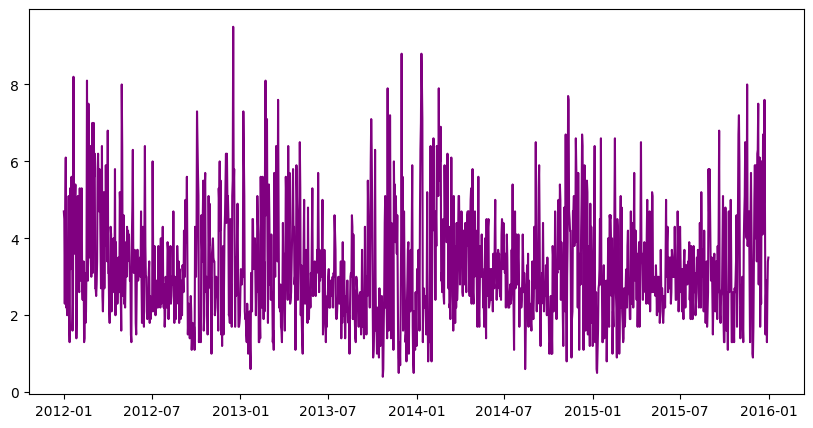

In [6]:
plot_draw("index", "wind", data=weather, color="purple")

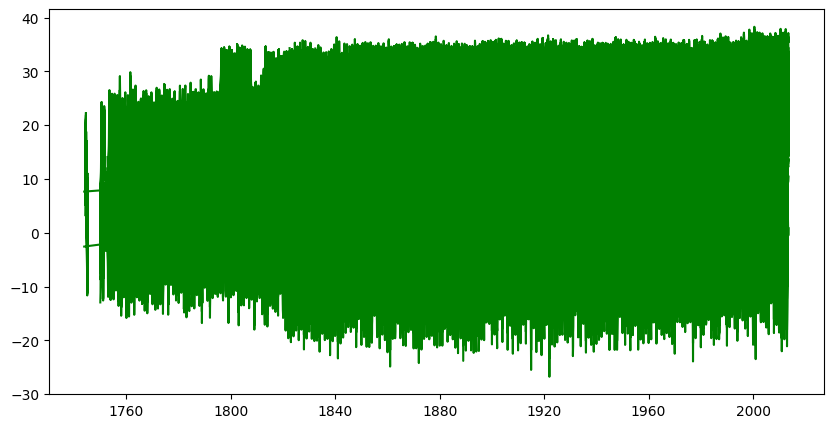

In [7]:
plot_draw(temperature.index, temperature["AverageTemperature"], color = "g")

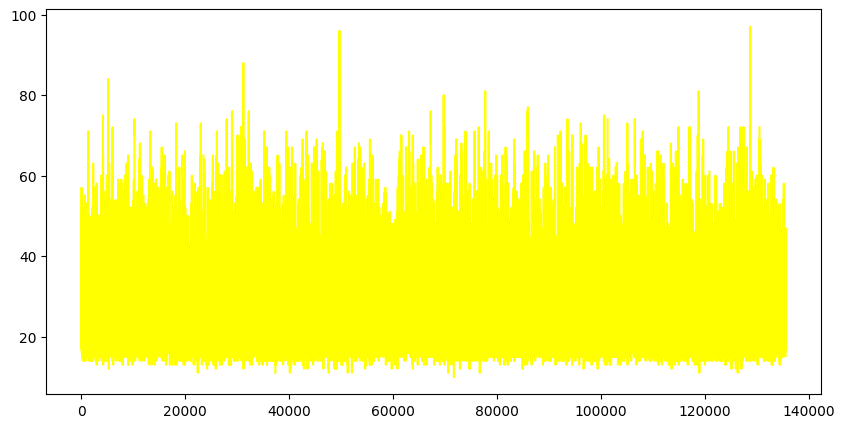

In [8]:
plot_draw(olympic.index, olympic["Age"], color="yellow")

Skonstruuj wizualizację wykresu pudełkowego przy użyciu zbioru danych pogodowych, aby przedstawić rozkład opadów w różnych typach warunków pogodowych.

Wykorzystaj zbiór danych o nazwie weather.csv, który zawiera codzienne obserwacje pogody.

Kluczowe kolumny obejmują:

precipitation (numeryczna): Ilość zarejestrowanych opadów.
weather (kategoryczna): Rodzaj zaobserwowanej pogody (np. słonecznie, pochmurno, deszcz, śnieg).

Przygotowanie danych
Przed utworzeniem wykresu upewnij się, że zestaw danych został poprawnie załadowany i wyczyszczony. Usuń wszelkie brakujące wartości w kolumnach Precipitation i WeatherType.

Wykresy
Utwórz wykres pudełkowy przedstawiający rozkład opadów dla każdego unikalnego typu pogody. Upewnij się, że każdy typ pogody jest wyraźnie oznaczony na wykresie.

Dostosowanie
Zastosuj odpowiednie etykiety do osi X (typ pogody) i osi Y (opady). Uwzględnij znaczący tytuł wykresu, który przekazuje cel wizualizacji.

In [9]:
weather.head()

,precipitation,temp_max,temp_min,wind,weather
date,,,,,
2012-01-01,0.0,12.8,5.0,4.7,drizzle
2012-01-02,10.9,10.6,2.8,4.5,rain
2012-01-03,0.8,11.7,7.2,2.3,rain
2012-01-04,20.3,12.2,5.6,4.7,rain
2012-01-05,1.3,8.9,2.8,6.1,rain


In [10]:
weather["weather"].dropna(inplace=True)

In [11]:
weather["precipitation"].dropna(inplace=True)

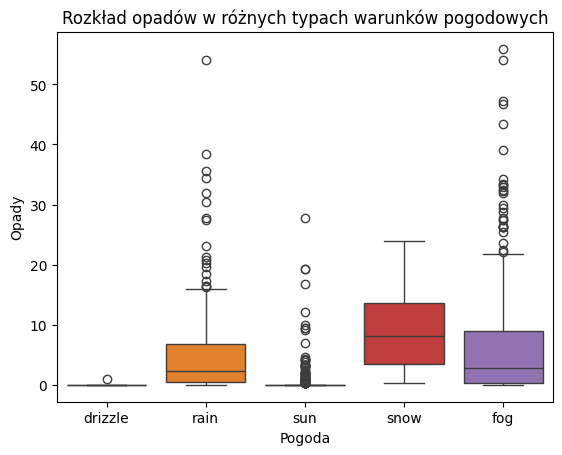

In [12]:
ax = sns.boxplot(
    x='weather',
    y='precipitation',
    data=weather,
    hue="weather",
)
ax.set(xlabel="Pogoda", ylabel="Opady", title="Rozkład opadów w różnych typach warunków pogodowych")
plt.show()

Utwórz wykres słupkowy ze słupkami błędów dla zbioru danych weather.csv pokazujący średnie opady według typu pogody, ponieważ słupki błędów pokazują odchylenie standardowe od średnich opadów.

In [13]:
weather.head()

,precipitation,temp_max,temp_min,wind,weather
date,,,,,
2012-01-01,0.0,12.8,5.0,4.7,drizzle
2012-01-02,10.9,10.6,2.8,4.5,rain
2012-01-03,0.8,11.7,7.2,2.3,rain
2012-01-04,20.3,12.2,5.6,4.7,rain
2012-01-05,1.3,8.9,2.8,6.1,rain


In [14]:
def get_dict_with_grouped_data(df, column):
  groupby = df.groupby(column)
  return {x: groupby.get_group(x) for x in groupby.groups}

In [15]:
by_weather = get_dict_with_grouped_data(weather, 'weather')

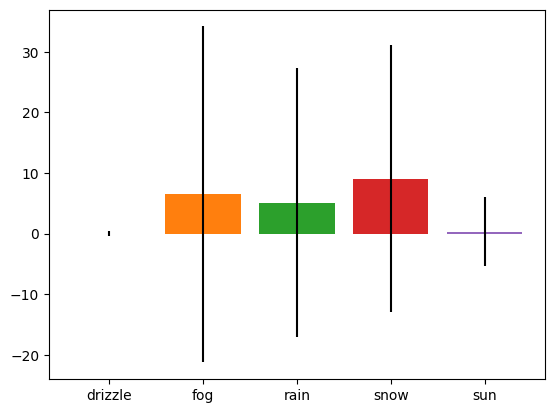

In [16]:
fig, ax = plt.subplots()

for weather_type in by_weather:
    ax.bar(
        str(weather_type),
    by_weather[weather_type]['precipitation'].mean(),
        yerr=by_weather[weather_type]['precipitation'].std()*3
    )


plt.show()

In [17]:
from plotnine import *
from plotnine.data import mpg

mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


Utwórz histogram, aby zwizualizować rozkład pojemności silnika ("displ").

Następnie utwórz sns.jointplot() pokazujący związek pojemności silnika ("displ") z liczbą mil na galon na autostradzie ("hwy").

Określa kolor słupków histogramu.

Dołącz opisy osi i tytuł wykresu.

Zmodyfikuj motyw wykresu, aby zmienić tło (na przykład zmieniając kolor z ciemnoszarego na biały i usuwając linie siatki

In [18]:
sns.set_style('white')

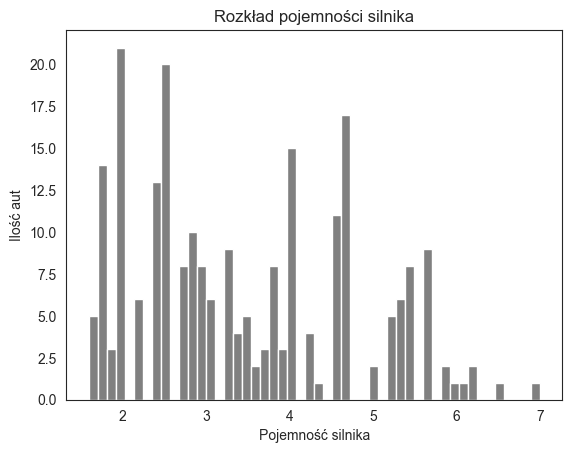

In [19]:
fig, ax = plt.subplots()
ax.hist(mpg["displ"], bins=50, label="displ", color="gray")

ax.set_title("Rozkład pojemności silnika")
ax.set_xlabel("Pojemność silnika")
ax.set_ylabel("Ilość aut")

plt.show()

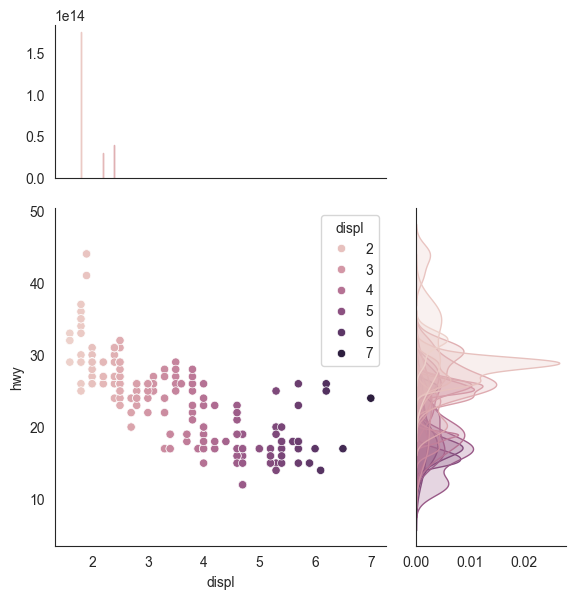

In [20]:
sns.jointplot(data=mpg, x="displ", y="hwy", hue="displ", height=6, ratio=2, marginal_ticks=True)

plt.show()

Zrefaktoruj kod dla wykresu zestawu danych pogodowych dla Austin, aby uniknąć powtarzającego się kopiowania i wklejania, co uważane jest za złą praktykę i może prowadzić do trudności w późniejszej korekcie.

Dynamiczne generowanie wykresów
Zaimplementuj rozwiązanie, które pozwala uniknąć kodowania poleceń wykresu dla każdej linii. Użyj zapętlonych struktur do dynamicznego generowania każdej linii wykresu w oparciu o predefiniowane konfiguracje.

Konfigurowalne atrybuty wykresu
Zdefiniuj tablice lub listy zawierające atrybuty dla każdej linii, takie jak colors, line_styles i weather_metrics do wykreślenia (np. średnie, wysokie i niskie temperatury lub punkty rosy).

Dostosowywanie wykresów cząstkowych
Upewnij się, że kod obsługuje tworzenie wielu wykresów cząstkowych dla różnych kategorii danych (np. temperatura i punkt rosy) oraz podkategorii (np. minimum, średnia, maksimum).

Etykiety i tytuły osi
Programowe ustawianie etykiet osi i tytułów wykresów. Zawiera szczegółowe instrukcje dotyczące ustawiania wspólnej etykiety osi X na dolnym podwykresie oraz etykiet osi Y odpowiadających wizualizowanym danym.

Unikaj wartości zakodowanych na stałe
Tam, gdzie to możliwe, unikaj zakodowanych na stałe wartości liczbowych dla indeksów i wycinania, co pozwala na elastyczność w zmianie zakresu wyświetlanych danych bez głębokich modyfikacji kodu. Takie podejście jest szczególnie korzystne w przypadku oznaczania adnotacjami określonych punktów danych, takich jak najniższa średnia temperatura.

Wizualizacja wyników
Produkt końcowy powinien pomyślnie wygenerować i wyświetlić wykres replikujący strukturę dostarczonego przykładu z ulepszeniami w zakresie wydajności kodu i skalowalności.


In [21]:
url='https://raw.githubusercontent.com/matzim95/ML-datasets/master/austin_weather.csv'

austin_weather = pd.read_csv(url, parse_dates=True, index_col='Date')
austin_weather.head(2)

,TempHighF,TempAvgF,TempLowF,DewPointHighF,DewPointAvgF,DewPointLowF,HumidityHighPercent,HumidityAvgPercent,HumidityLowPercent,SeaLevelPressureHighInches,SeaLevelPressureAvgInches,SeaLevelPressureLowInches,VisibilityHighMiles,VisibilityAvgMiles,VisibilityLowMiles,WindHighMPH,WindAvgMPH,WindGustMPH,PrecipitationSumInches,Events
Date,,,,,,,,,,,,,,,,,,,,
2013-12-21,74,60,45,67,49,43,93,75,57,29.86,29.68,29.59,10,7,2,20,4,31,0.46,"Rain , Thunderstorm"
2013-12-22,56,48,39,43,36,28,93,68,43,30.41,30.13,29.87,10,10,5,16,6,25,0,


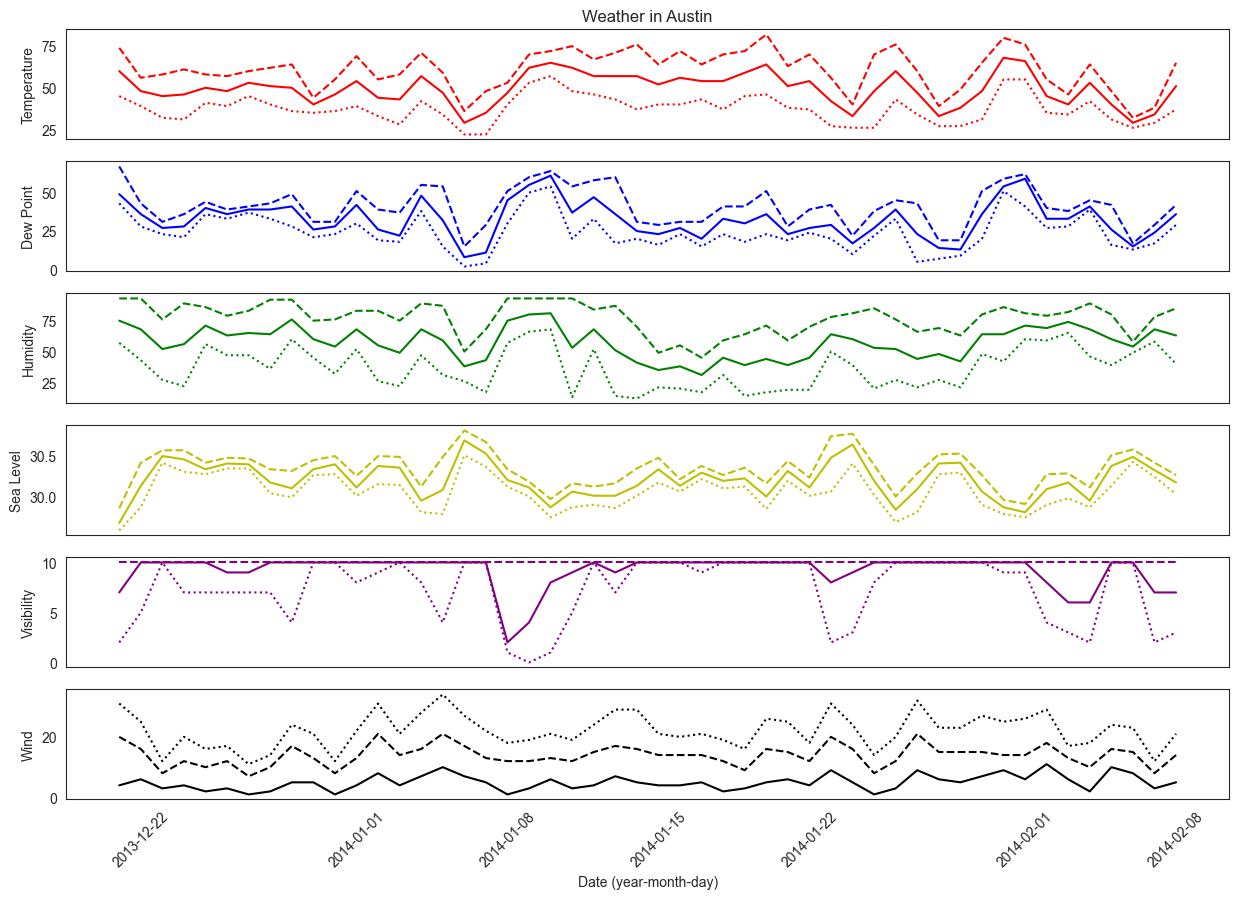

In [22]:
n=50

cols = list(austin_weather.columns)[:-2]
p = int(np.ceil(len(cols) / 3))
fig, ax=plt.subplots(p, 1, sharex=True, figsize=(15, 10))

colors = ["r", "b", "g", "y", "purple", "black"]
linestyles = ["--", "solid", "dotted"]
labels = ["Temperature", "Dew Point", "Humidity", "Sea Level", "Visibility", "Wind"]

plot_n = 0
line_n = 0
for col in cols:
    if line_n == 3:
        line_n = 0
        plot_n += 1
    ax[plot_n].plot(
        austin_weather.index[:n],
        austin_weather[col][:n].astype(float),
        color = colors[plot_n],
        linestyle = linestyles[line_n]
    )
    line_n += 1
    ax[plot_n].set_ylabel(labels[plot_n])

ax[p-1].set_xlabel('Date (year-month-day)')
ax[0].set_title('Weather in Austin')
ax[p-1].xaxis.set_tick_params(rotation=45)

plt.show()